Utility functions to clean and tokenize the code text

In [10]:
def remove_line_formats(text):
  """
  Removes literals like '\n', '\' which are results of code being presented as text
  params:
  text  (str) - the text in its initial form
  Returns
  ------
  cleaned_text
  """
  cleaned_text = text.replace('\n','').replace("b\'",'').replace('\r','').replace("'",'').replace('\\','')
  return cleaned_text.strip()

In [11]:
def remove_block_comment(clean_text):
  """
  Removes block comments from the clean_text, if found
  params:
  ------
  clean_text
  returns
  ------
  clean text - text without the block comment or the param when bloc comment not found
  """
  import re
  COMMENTS = re.compile(r'''
    (.*?\*/)
    |
    (/\*.*?\*/)''', re.VERBOSE)

  return COMMENTS.sub('', clean_text)

In [12]:
def get_data(data_path):
  """
  Gets the data saved in parquet format from the path
  params:
  ------
  The path url
  returns
  -------
  pandas df
  """
  import pandas as pd
  data_df = pd.read_parquet(data_path)

  return data_df

In [13]:
data_path = "/content/drive/MyDrive/PhD NDSU SE/PhDDissertation/curated_for_ML_NLP/curated_lin_data.parquet" # Path to data

In [14]:
curated_data = get_data(data_path).head(10) # First 10 rows of the data for demonstration

In [15]:
list_of_codetext_tokens = [remove_block_comment(remove_line_formats(codetext)).split() for codetext in list(curated_data['code_as_a_text'])]

In [16]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Get list of code text tokens
list_of_codetext_tokens = [remove_block_comment(remove_line_formats(codetext)).split() for codetext in list(curated_data['code_as_a_text'])]

# Train Word2Vec model
model = Word2Vec(sentences=list_of_codetext_tokens, vector_size=100, window=5, min_count=5, workers=4)

# Save the model (optional)
#model.save("word2vec_model")

# Load the model (if saved)
# model = Word2Vec.load("word2vec_model")

# Get the word vector for a specific word
# word_vector = model.wv['word']
# print("Word vector for 'word':", word_vector)

# Find similar words
# similar_words = model.wv.most_similar('word', topn=3)
# print("Words similar to 'word':", similar_words)


 - vector_size: the number of dimensions of the space that gensim word2vec maps the words onto. The bigger, the more training data required, and better accuracy. Default value is 100
 - window:
 - min_count: pruning internal dictionary. The number of times a word must appear than before it can be said to be of meaningful purpose in training. default value is 5.
 - workers: no of cores for model training

In [17]:
# Sample words for visualization
token_list_merge = []
for token_list in list_of_codetext_tokens:
  token_list_merge.extend(token_list)

words_to_visualize = list(set(token_list_merge)) # Just to a list of unique tokens to visualize

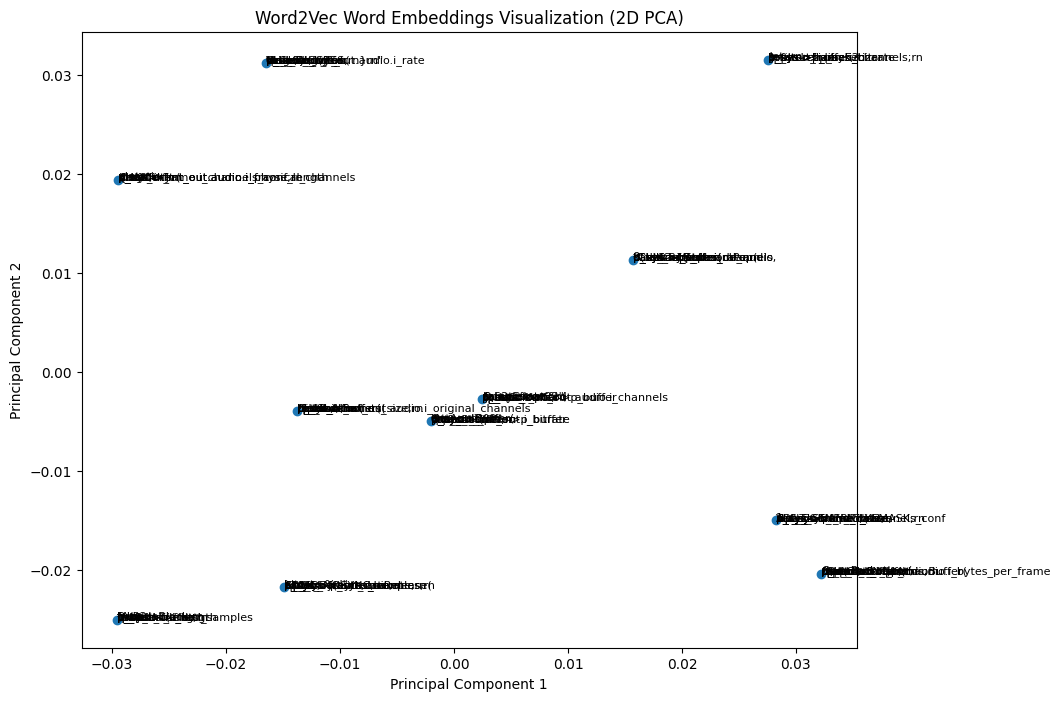

In [23]:
# Load the pre-trained Word2Vec model (or train your own)
# model = Word2Vec.load("path/to/your/word2vec/model")

# Get vectors for selected words
word_vectors = [model.wv[word] for word in words_to_visualize if word in model.wv]

# Apply PCA to reduce dimensionality to 2D
pca = PCA(n_components=2)
word_vectors_2d = pca.fit_transform(word_vectors)

# Plot the words in 2D space
plt.figure(figsize=(10, 8))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1])

# Annotate points with words
for i, word in enumerate(words_to_visualize):
    plt.annotate(word, xy=(word_vectors_2d[i % 11, 0], word_vectors_2d[i % 11, 1]), fontsize=8)

plt.title('Word2Vec Word Embeddings Visualization (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')